In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd
import matplotlib.colors as colors
import gravis as gv

In [2]:
pd.set_option('display.max_rows', 10)

In [3]:
Relations = pd.read_csv('R_M_relations.csv')
display(Relations)

,src,dest
0,Rick Sanchez,Beth Sanchez
1,Rick Sanchez,Diane Sanchez
2,Rick Sanchez,Beth Smith (Cronenberged dimension)
3,Rick Sanchez,Space Beth
4,Rick Sanchez,Jerry Smith (Cronenberged dimension)
...,...,...
705,Morty Smith (Jerry's original dimension),Jerry Smith (C-131)
706,Morty Smith (Jerry's original dimension),Beth Smith
707,Morty Smith (Jerry's original dimension),Summer Smith
708,Morty Smith (Jerry's original dimension),Rick Sanchez


In [4]:
Species = pd.read_csv('R_M_species.csv').drop_duplicates(ignore_index=True)
display(Species)

,name,species
0,Rick Sanchez,Human
1,Morty Smith,Human
2,Summer Smith,Human
3,Beth Sanchez,Human
4,Jerry Smith Prime,Human
...,...,...
624,Night Summer,Human
625,Rhett Caan,Other
626,Jessica (Cronenberged Dimension),Human
627,Mr. Stringbean,Alien


In [5]:
node_colors = {'Alien':'#ACF127',
'Animal':'#316759',
'Clone':'#BEA968',
'Droid':'#425B77',
'Human':'#63CBFB',
'Human-Animal':'#F5F242',
'Mythological':'#14316A',
'Other':'#F9B798',
'Robot':'#BDBDBD',
'Unknown':'#392C21'
}
Species['color']=Species['species'].map(node_colors)

In [6]:
allSpecies=Species.groupby('species').count().drop(columns=['name','color']).reset_index()
allSpecies['color']=allSpecies['species'].map(node_colors)
allSpecies=allSpecies.set_index('species').to_dict(orient='index')

In [7]:
graph = nx.from_pandas_edgelist(Relations, source = 'src', target = 'dest')

In [8]:
attr=Species.to_dict(orient='index')
nodes_attr={}
for node,elem in attr.items():
    nodes_attr[elem['name']] = {'species':elem['species'],'color':elem['color']}
nx.set_node_attributes(graph,nodes_attr)

In [9]:
print(nx.info(graph))

Graph with 262 nodes and 520 edges


C:\Users\mgale\AppData\Local\Temp\ipykernel_5844\3581210431.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(graph))


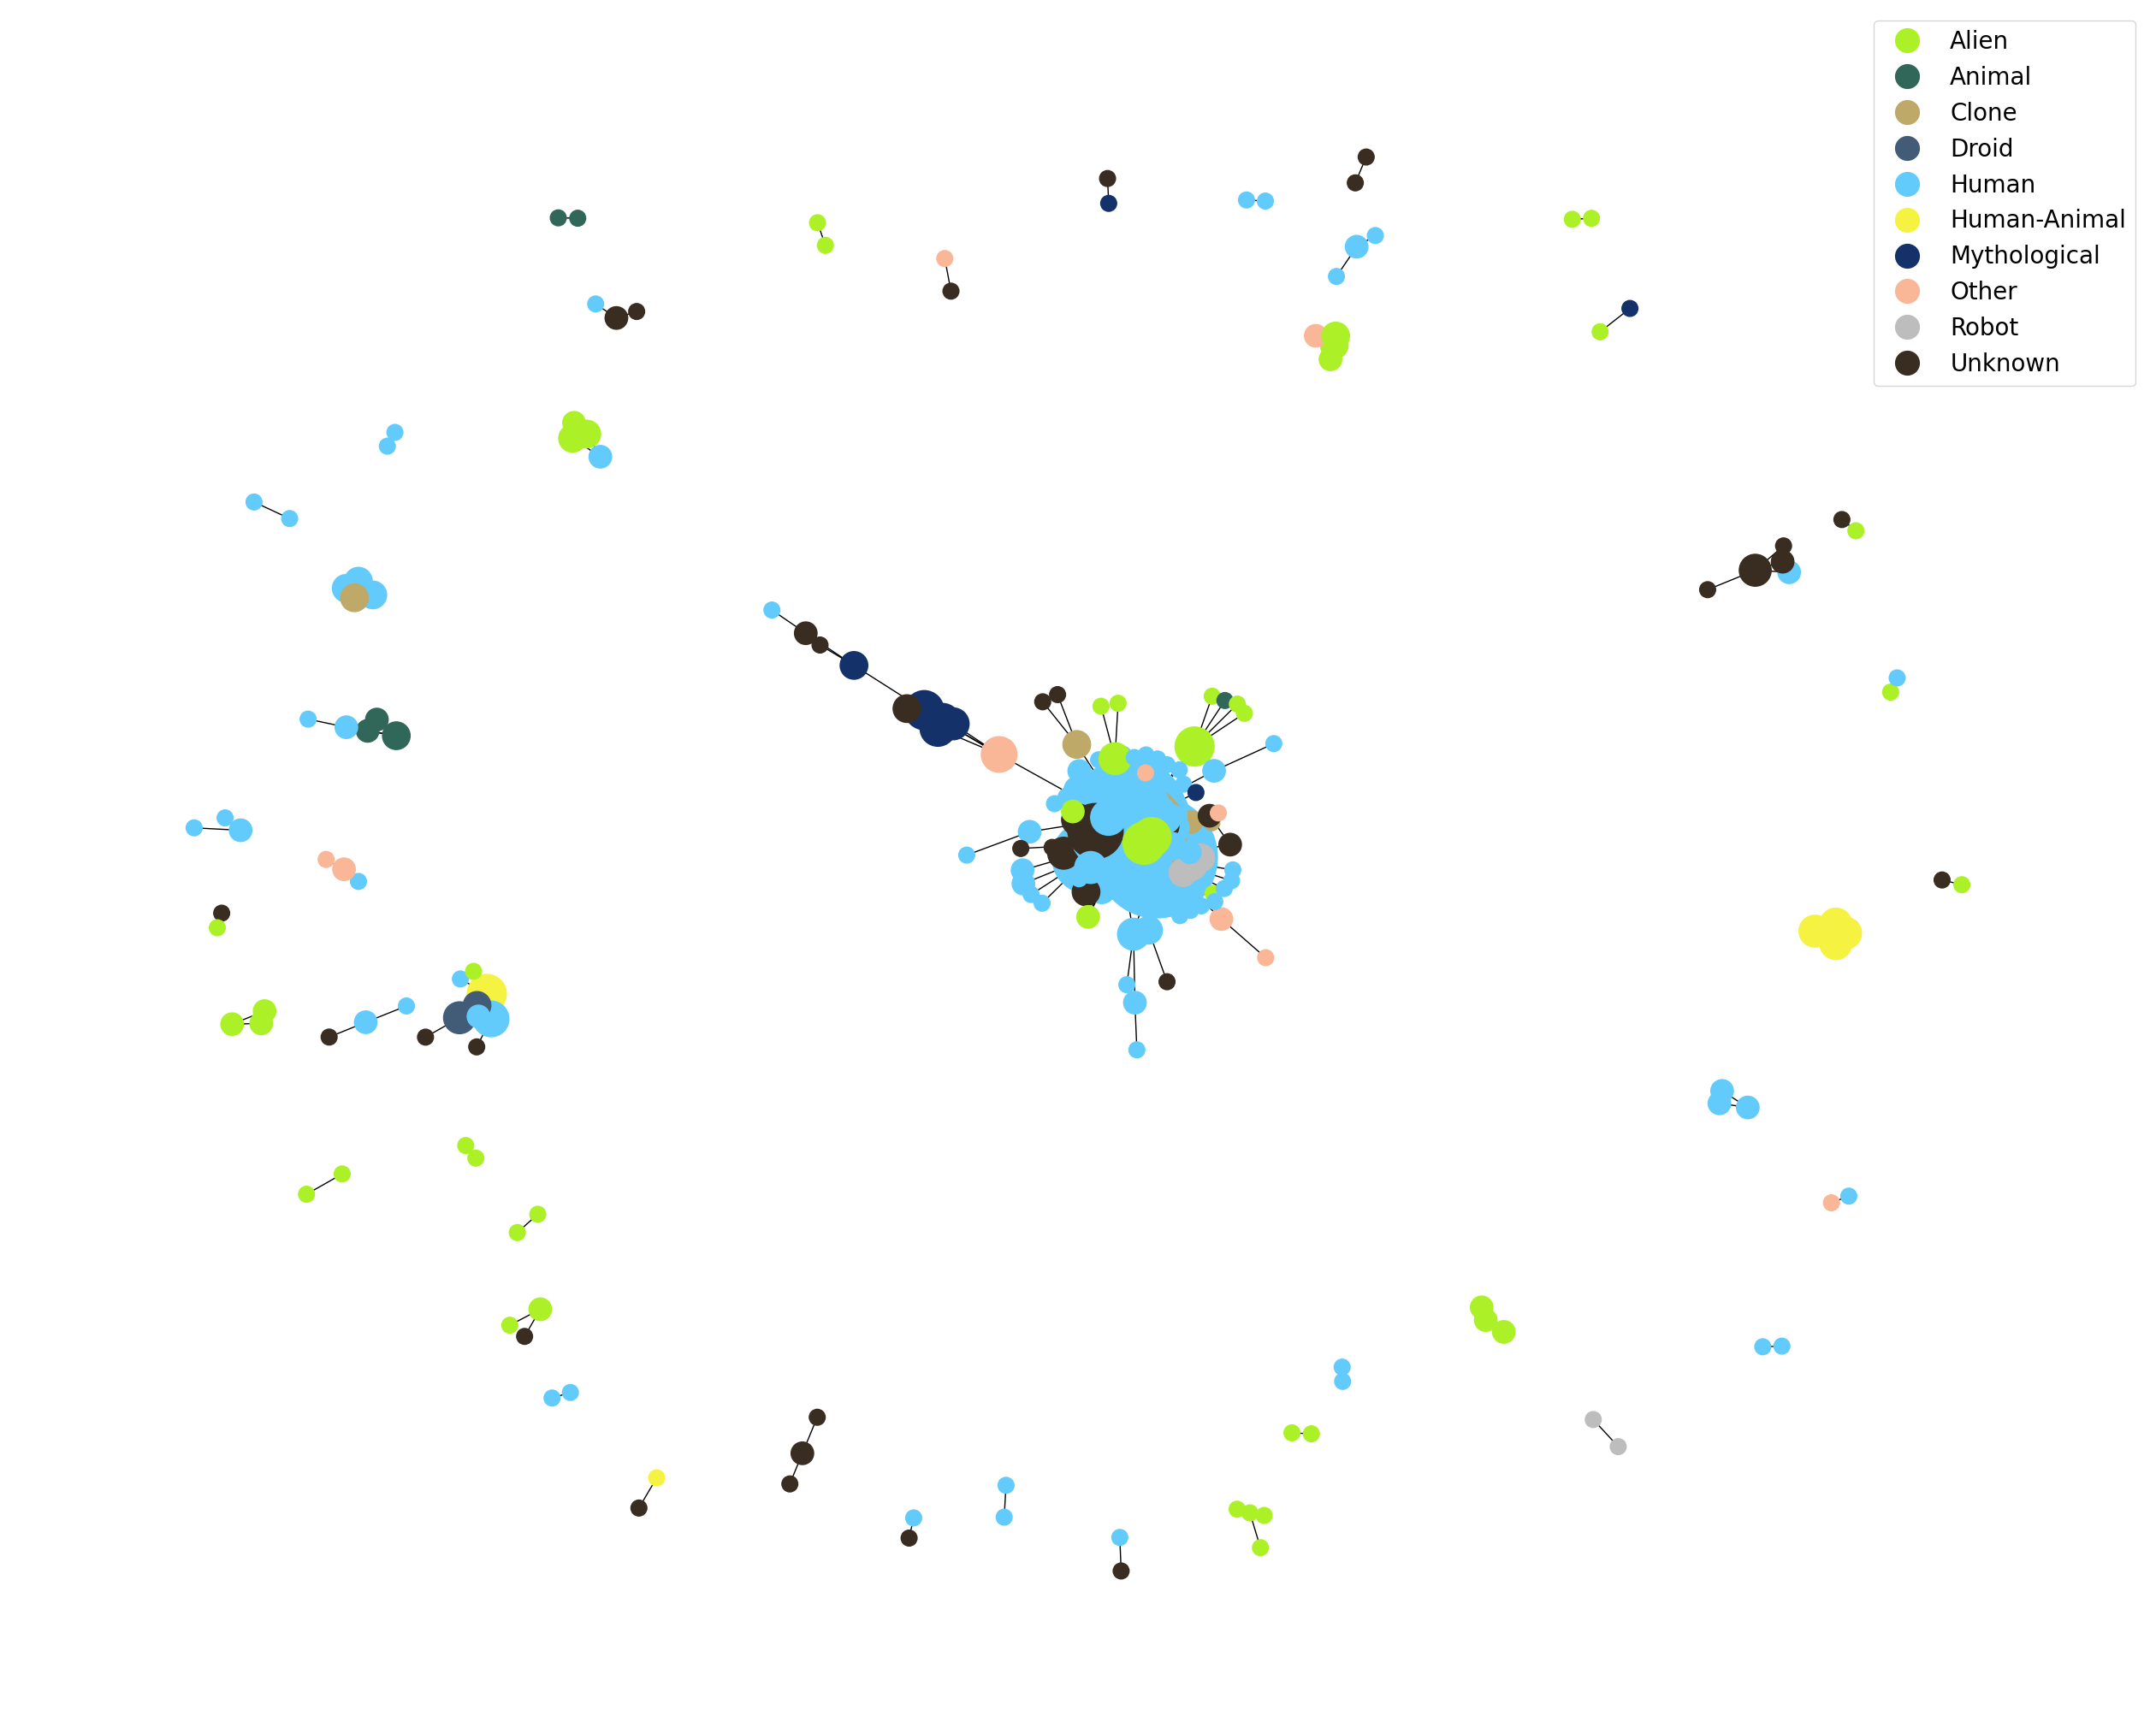

In [10]:
pos=nx.spring_layout(graph)
plt.figure(figsize=(25,20))
nCol=nx.get_node_attributes(graph,'color')
for n in graph.nodes:
    if not n in nCol:
        nCol[n]='#392C21'
d = dict(graph.degree)
nx.draw(graph, pos, node_color=[nCol[n] for n in graph.nodes],node_size=[v * 180 for v in d.values()])
#nx.draw_networkx_labels(graph, pos,font_size=12, font_color="black")
# Le sehuenti linee creano degli elementi fake che useremo per costruire la legenda
markers = [plt.Line2D([0,0],[0,0],color=color['color'], marker='o', linestyle='',markersize=20) for color in allSpecies.values()]
plt.legend(markers, allSpecies.keys(), numpoints=1, prop={'size': 20})
plt.show()

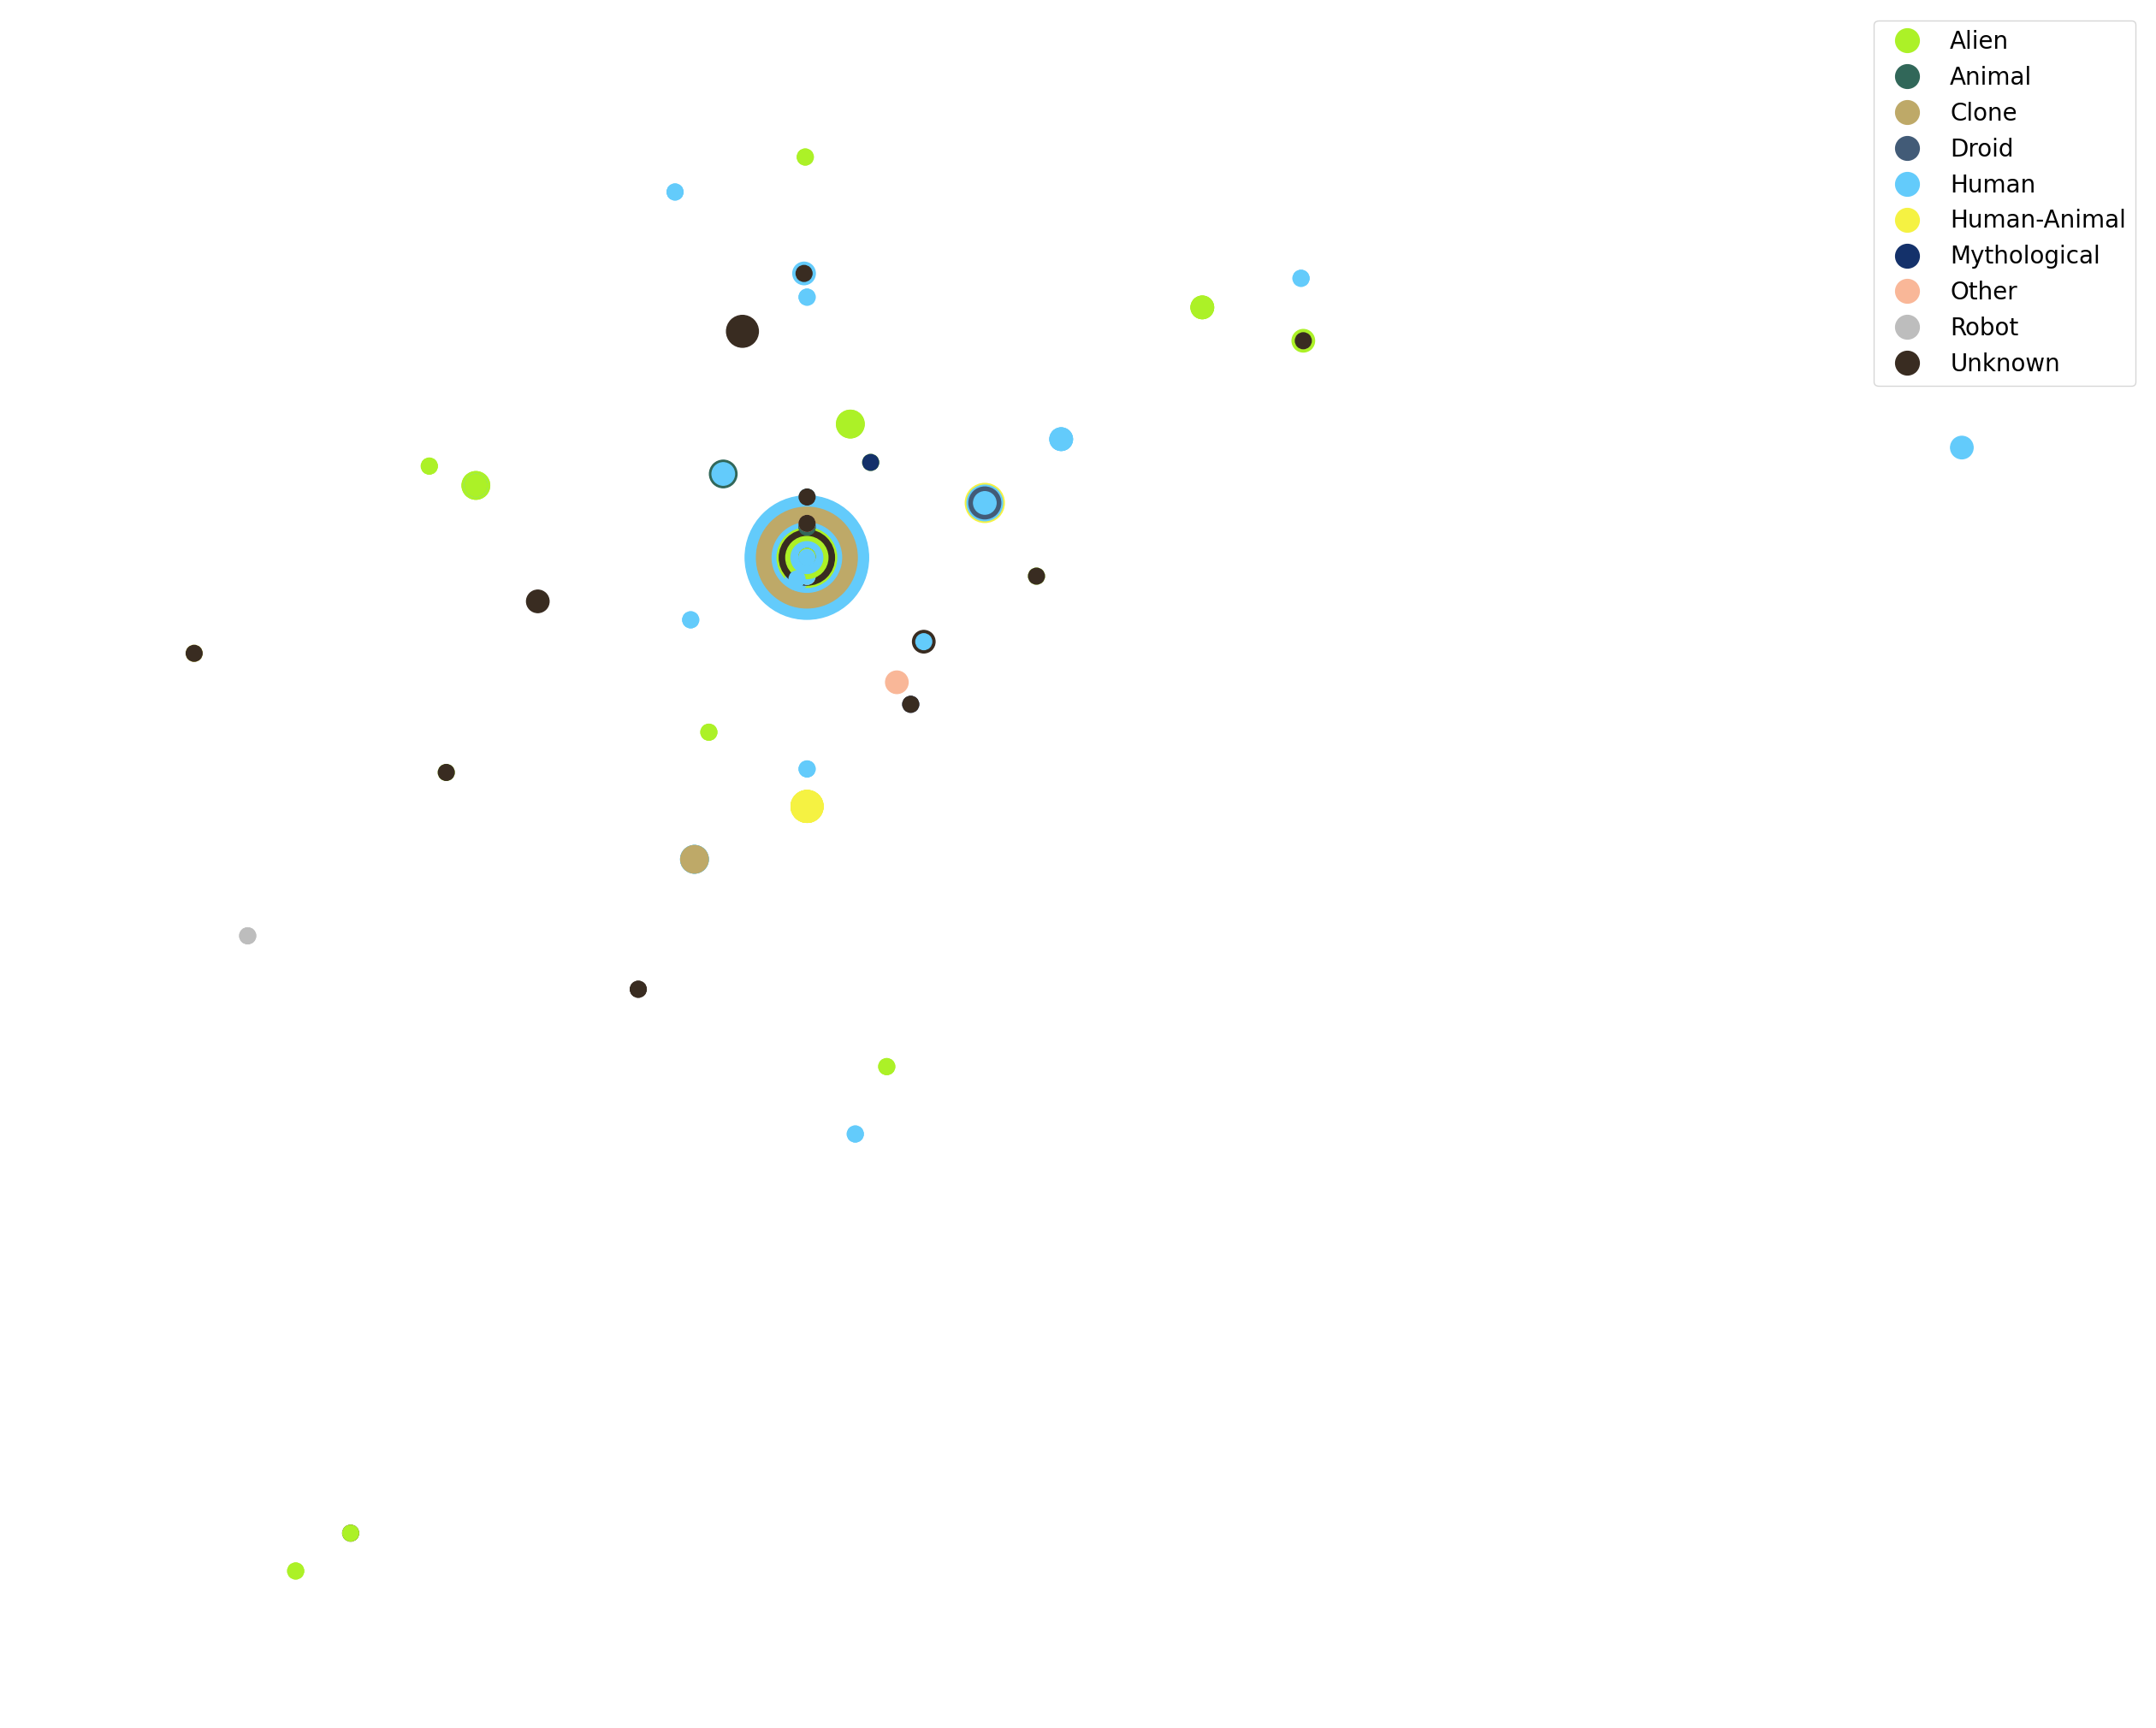

In [11]:
pos2=nx.spectral_layout(graph)
plt.figure(figsize=(25,20))
nx.draw(graph, pos2, node_color=[nCol[n] for n in graph.nodes],node_size=[v * 180 for v in d.values()])
# Le sehuenti linee creano degli elementi fake che useremo per costruire la legenda
markers = [plt.Line2D([0,0],[0,0],color=color['color'], marker='o', linestyle='',markersize=20) for color in allSpecies.values()]
plt.legend(markers, allSpecies.keys(), numpoints=1, prop={'size': 20})
plt.show()


In [12]:
gv.d3(graph)


In [24]:
from itertools import combinations
print('Il numero di triadi trovate è: '+str(nTriad))
triad_class={}
for nodes in nTriad:
    n_edges = graph.subgraph(nodes).number_of_edges()
    triad_class.setdefault(n_edges, []).append(nodes)
print('Il numero di triadi chiuse è: '+str(len(triad_class[3])))


Il numero di triadi trovate è: <itertools.combinations object at 0x0000016F7F6D77E0>
Il numero di triadi chiuse è: 801


In [ ]:
#nx.enumerate_all_cliques()

In [26]:
cliques=nx.find_cliques(graph)

In [38]:
cliq=[]
for clique in cliques:
    cliq.append(clique)
    print(clique)

['Bald Morty', 'Fancy Rick']
['Unnamed Uncle', 'Leonard Smith', 'Joyce Smith', 'Summer Smith', 'Beth Smith Prime', 'Morty Smith']
['Unnamed Uncle', 'Leonard Smith', 'Joyce Smith', 'Summer Smith', 'Beth Smith Prime', 'Jerry Smith']
['Unnamed Uncle', 'Leonard Smith', 'Joyce Smith', 'Summer Smith', 'Morty Jr.', 'Morty Smith', 'Beth Smith', 'Steven Smith', 'Hemorrhage']
['Unnamed Uncle', 'Leonard Smith', 'Joyce Smith', 'Summer Smith', 'Morty Jr.', 'Morty Smith', 'Beth Smith', 'Jerry Smith Prime']
['Unnamed Uncle', 'Leonard Smith', 'Joyce Smith', 'Summer Smith', 'Morty Jr.', 'Morty Smith', 'Beth Smith', 'Jerry Smith (C-131)', 'Naruto Smith']
['Unnamed Uncle', 'Leonard Smith', 'Joyce Smith', 'Summer Smith', 'Morty Jr.', 'Morty Smith', 'Beth Smith', 'Jerry Smith (C-131)', 'Hemorrhage']
['Unnamed Uncle', 'Leonard Smith', 'Joyce Smith', 'Summer Smith', 'Morty Jr.', 'Morty Smith', 'Gwendolyn', 'Hemorrhage', 'Steven Smith']
['Unnamed Uncle', 'Leonard Smith', 'Joyce Smith', 'Summer Smith', 'Morty 

In [41]:
maxcliq={'cliq':[],'n_elem':0}
for cli in cliq:
    if len(cli)>maxcliq['n_elem']:
        maxcliq['cliq']=cli
        maxcliq['n_elem']=len(cli)

In [42]:
print('La clique massimale con il maggior numero di elementi è: ')
print(maxcliq)

La clique massimale con il maggior numero di elementi è: 
{'cliq': ['Rick Sanchez', 'Morty Smith', 'Summer Smith', 'Beth Smith', 'Morty Jr.', "Rick's Father", 'Space Beth', 'Hemorrhage', 'Diane Sanchez', 'Sleepy Gary'], 'n_elem': 10}


In [39]:
print('Il numero totale di clique massimali è: '+str(len(cliq)))

Il numero totale di clique massimali è: 252


In [40]:
cliq_tot=[]
for clique in nx.enumerate_all_cliques(graph):
    cliq_tot.append(clique)
print('Il numero totale di clique è: '+str(len(cliq_tot)))

Il numero totale di clique è: 6159


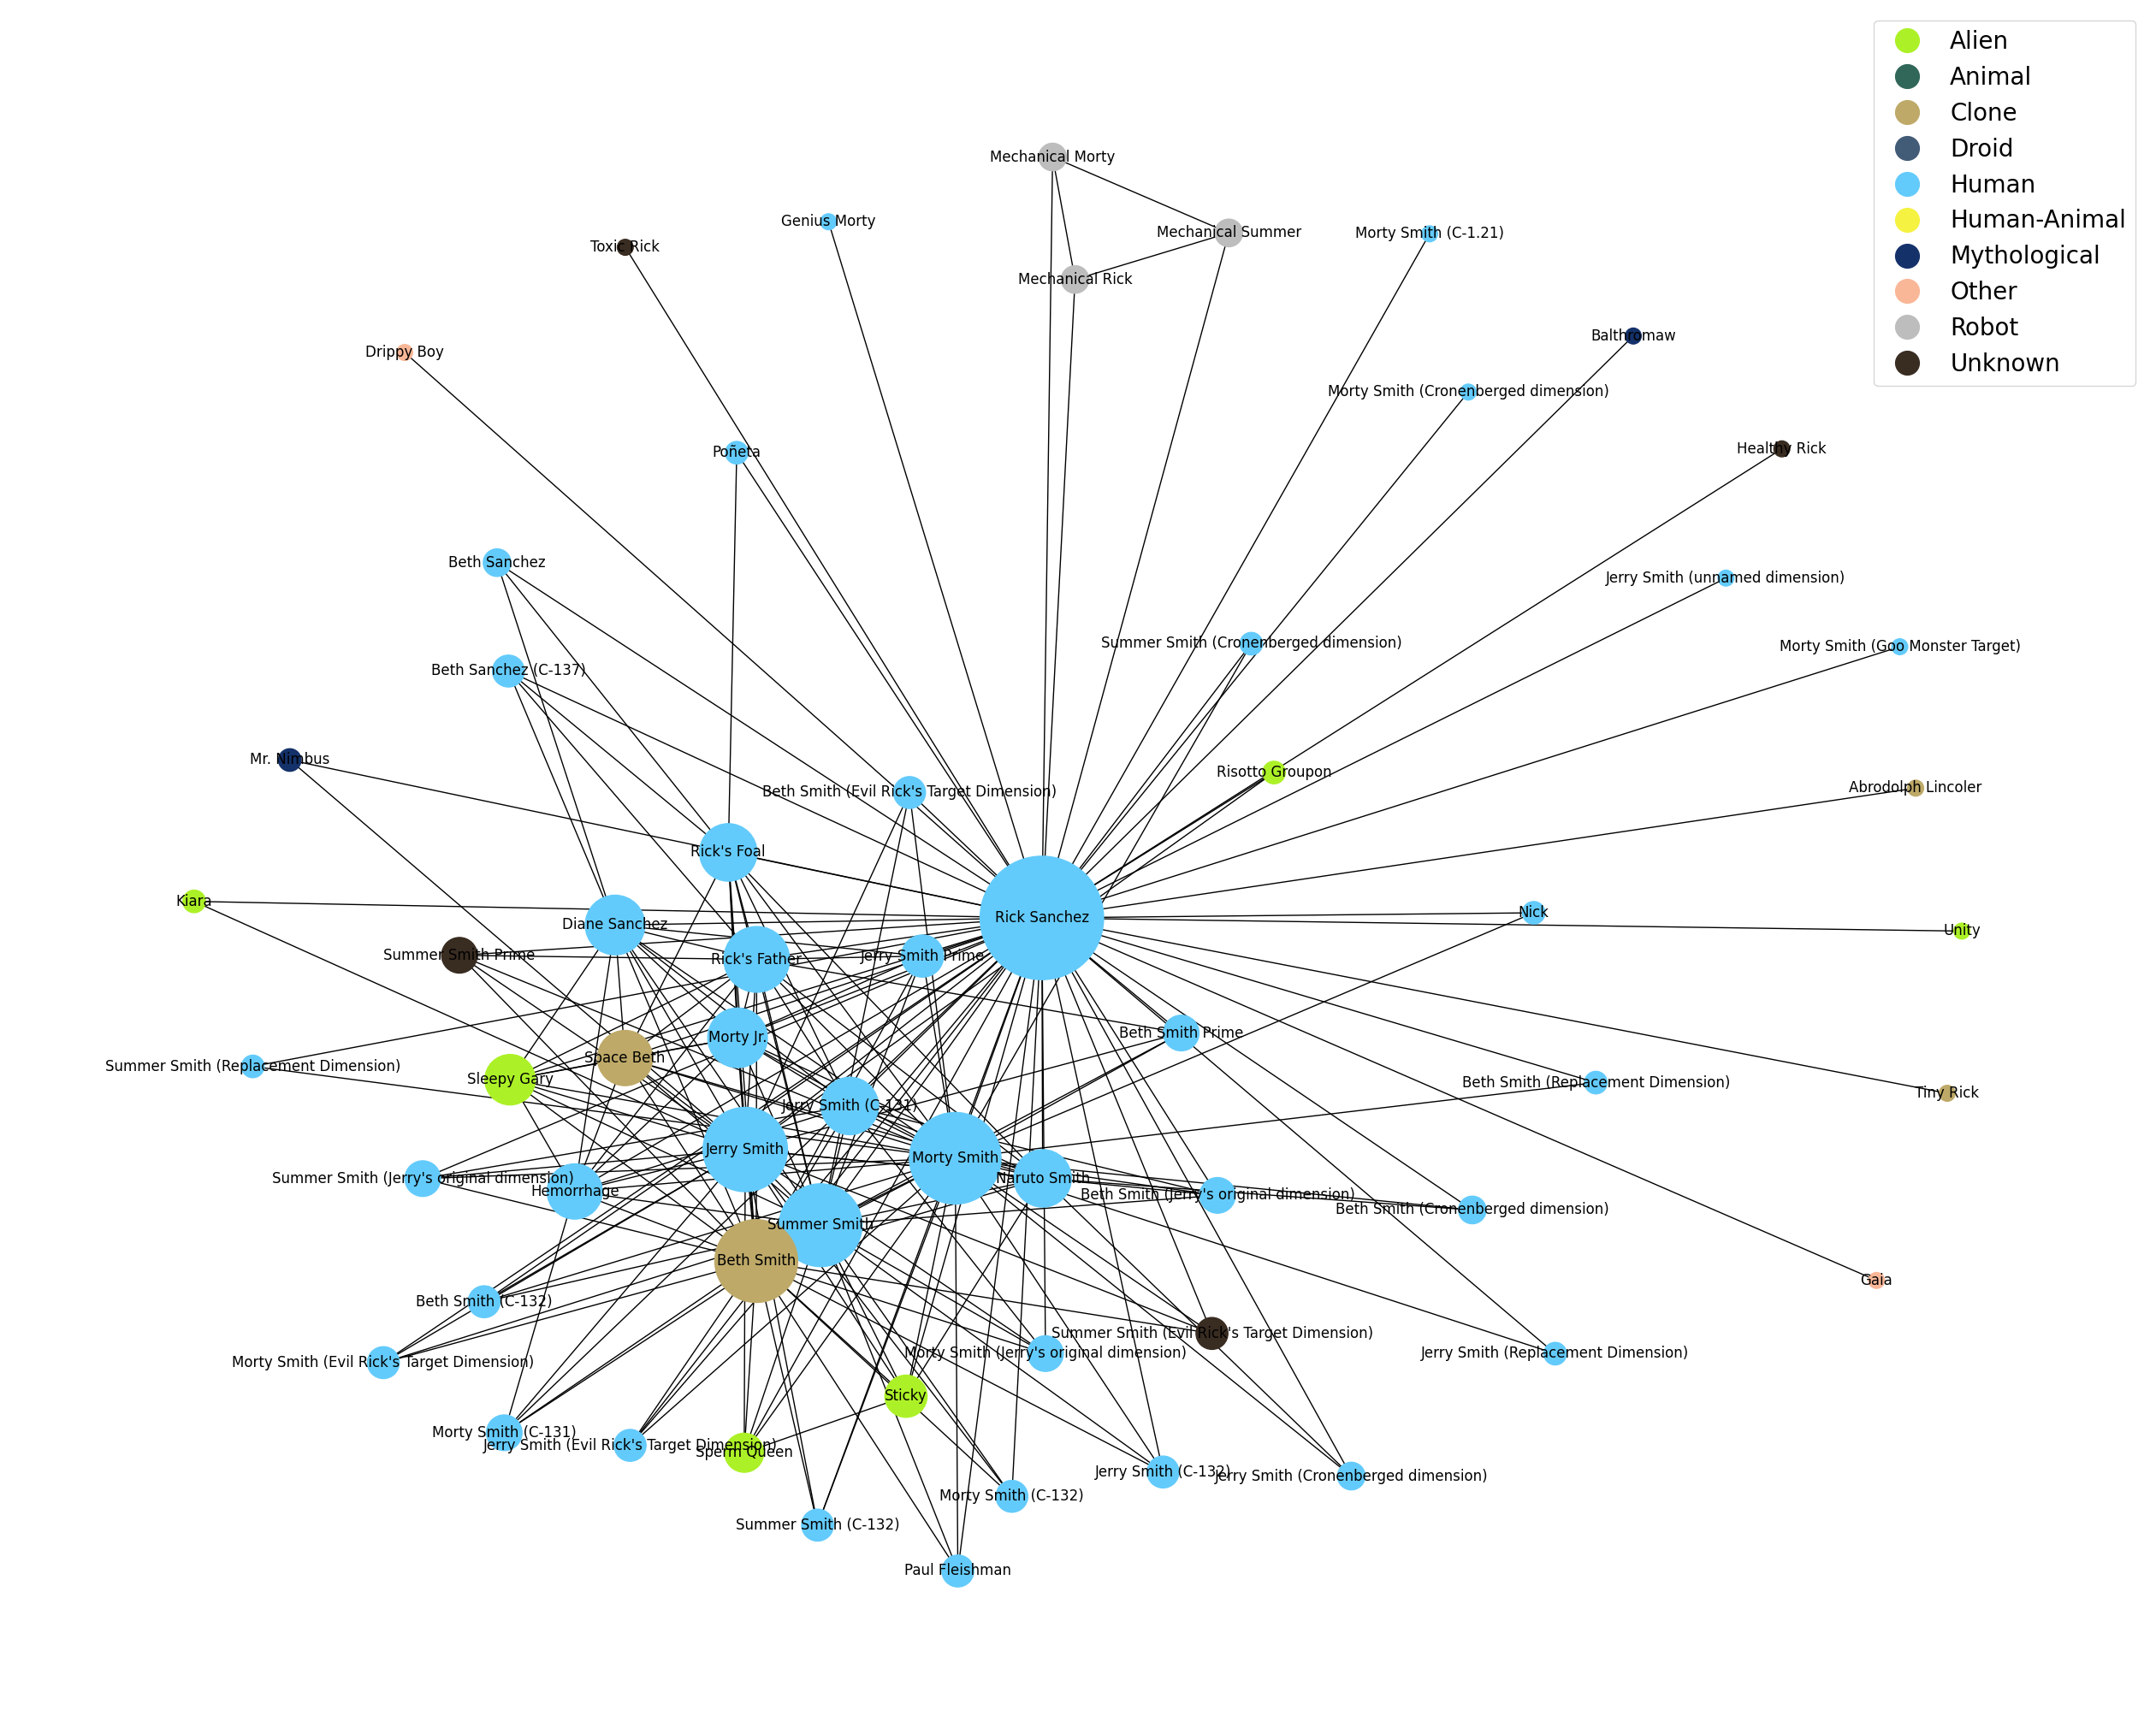

In [35]:
ego_rick=nx.ego_graph(graph,'Rick Sanchez')
pos3=nx.spring_layout(ego_rick)

plt.figure(figsize=(25,20))
nCol=nx.get_node_attributes(ego_rick,'color')
for n in ego_rick.nodes:
    if not n in nCol:
        nCol[n]='#392C21'
d = dict(ego_rick.degree)
nx.draw(ego_rick, pos3, node_color=[nCol[n] for n in ego_rick.nodes],node_size=[v * 180 for v in d.values()])
nx.draw_networkx_labels(ego_rick, pos3,font_size=12, font_color="black")
# Le sehuenti linee creano degli elementi fake che useremo per costruire la legenda
markers = [plt.Line2D([0,0],[0,0],color=color['color'], marker='o', linestyle='',markersize=20) for color in allSpecies.values()]
plt.legend(markers, allSpecies.keys(), numpoints=1, prop={'size': 20})
plt.show()

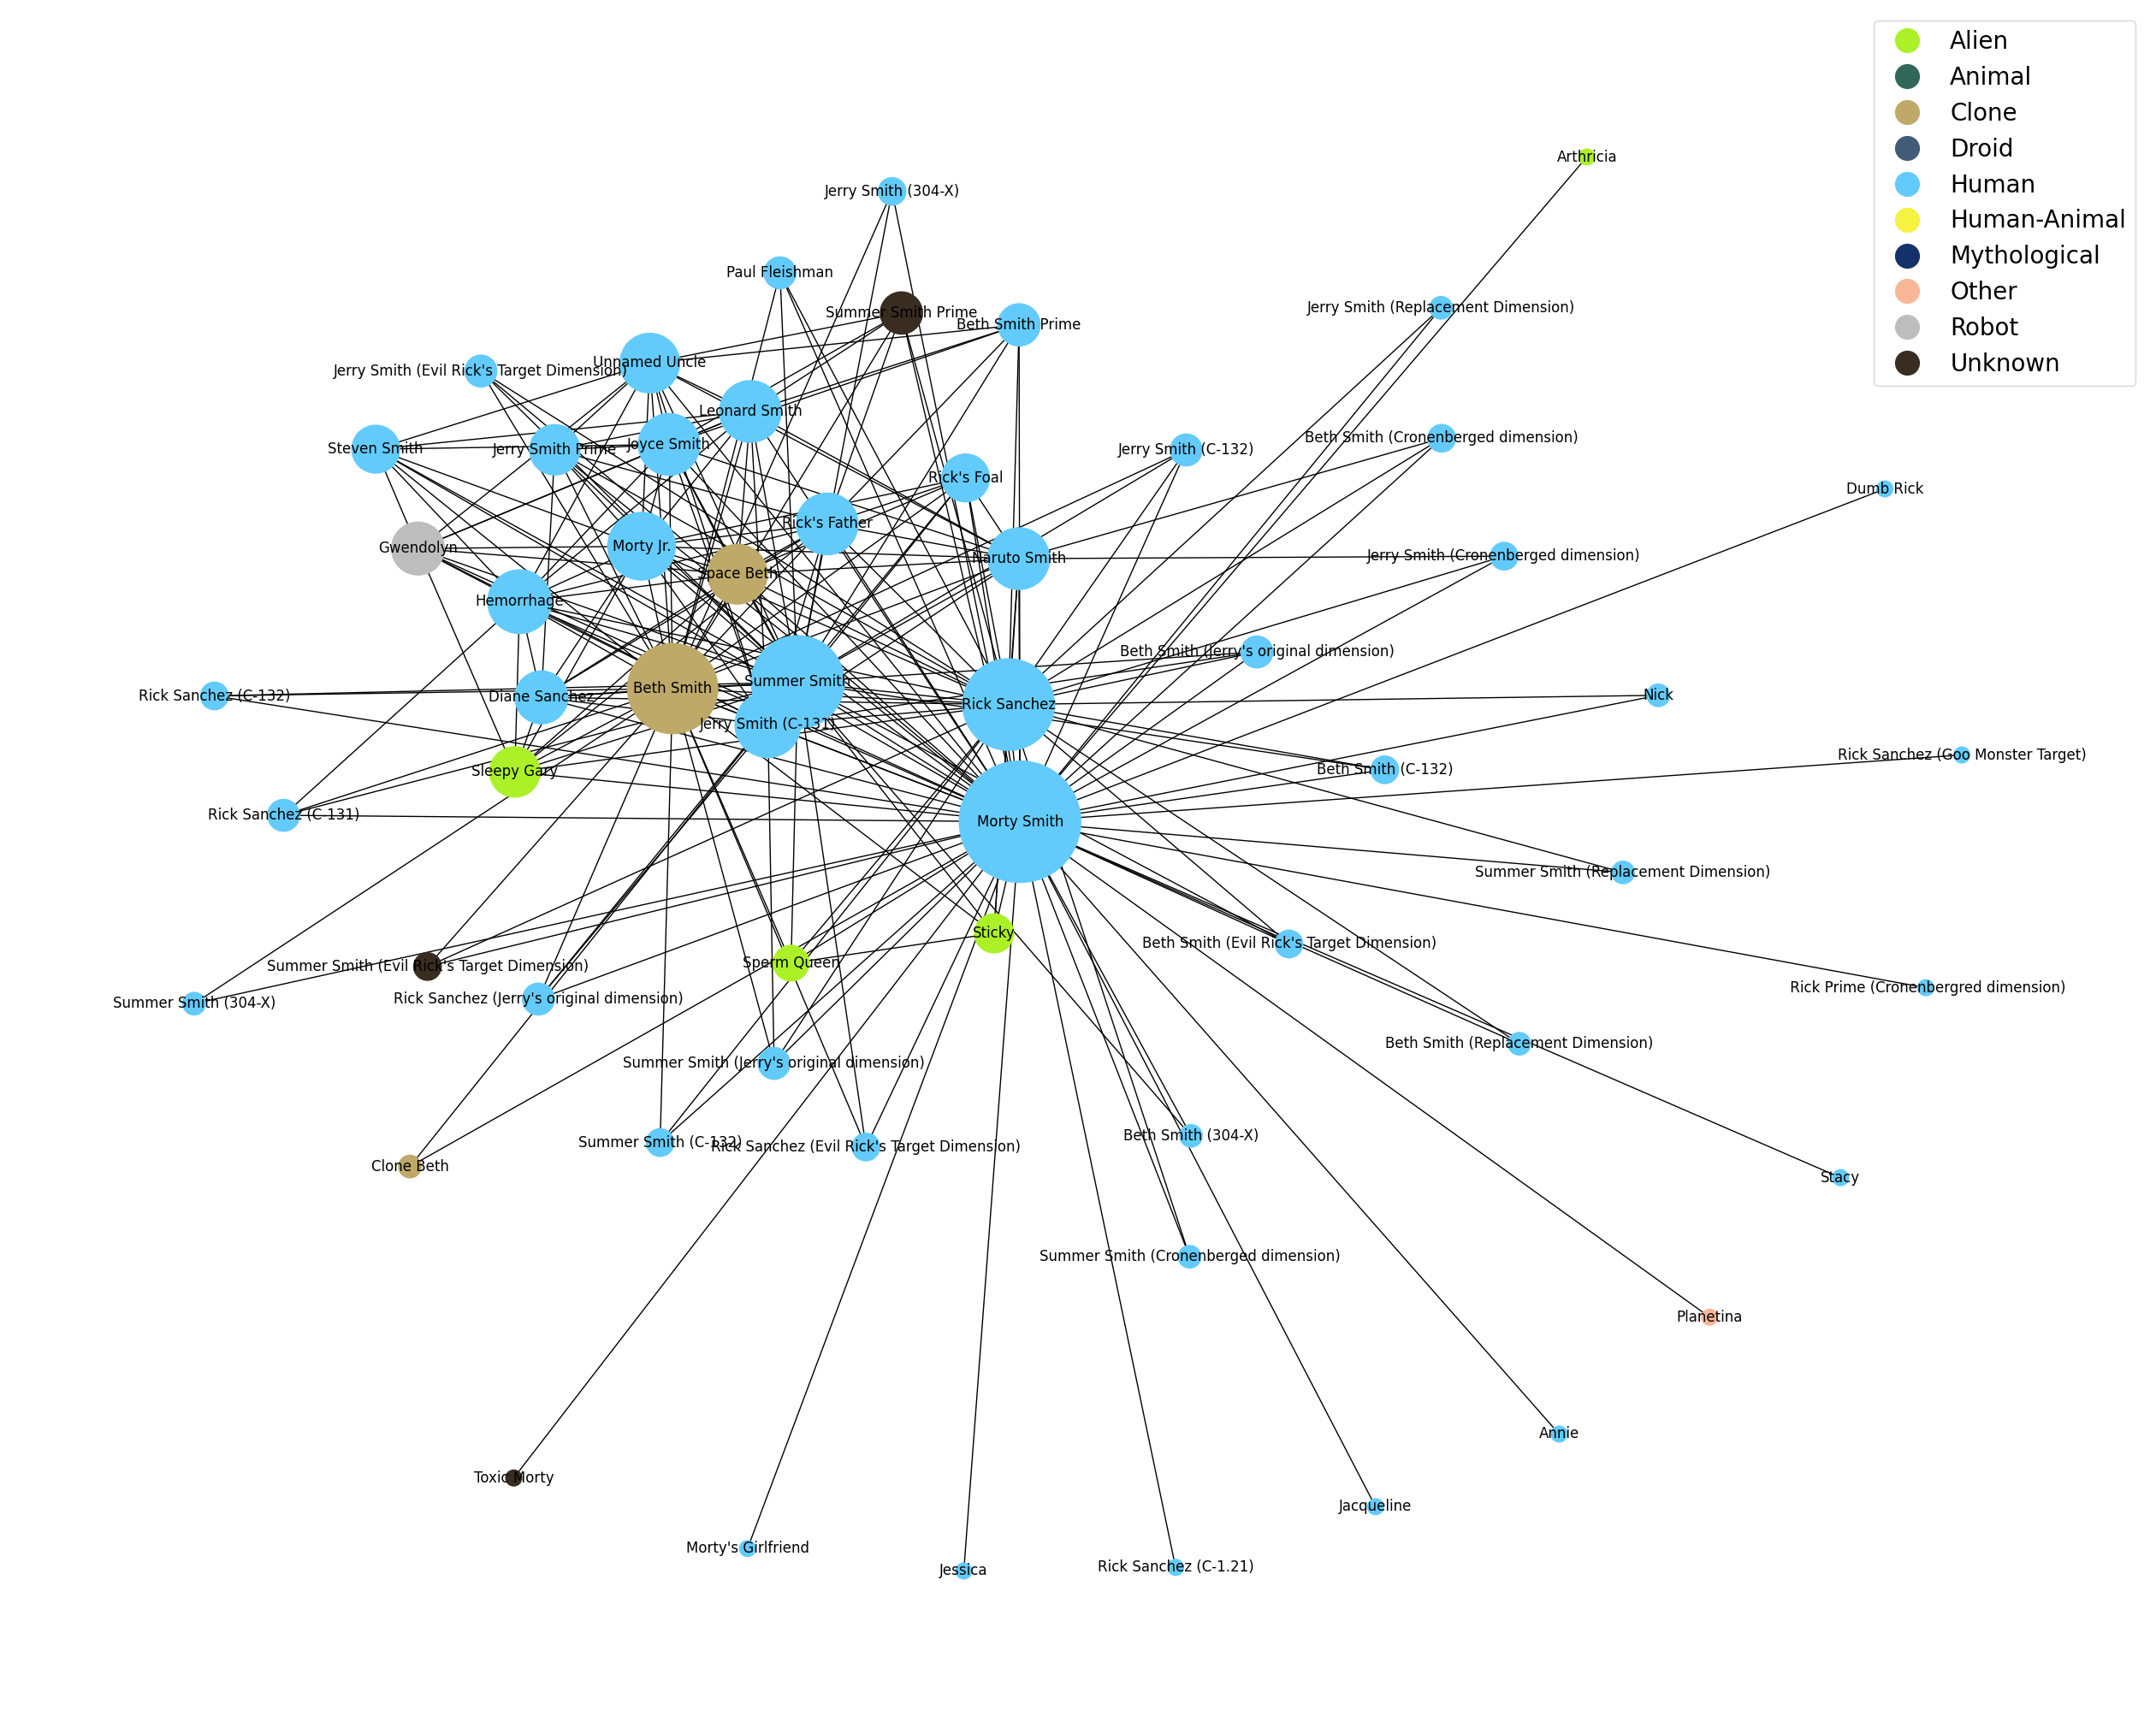

In [36]:
ego_morty=nx.ego_graph(graph,'Morty Smith')
pos4=nx.spring_layout(ego_morty)

plt.figure(figsize=(25,20))
nCol=nx.get_node_attributes(ego_morty,'color')
for n in ego_morty.nodes:
    if not n in nCol:
        nCol[n]='#392C21'
d = dict(ego_morty.degree)
nx.draw(ego_morty, pos4, node_color=[nCol[n] for n in ego_morty.nodes],node_size=[v * 180 for v in d.values()])
nx.draw_networkx_labels(ego_morty, pos4,font_size=12, font_color="black")
# Le sehuenti linee creano degli elementi fake che useremo per costruire la legenda
markers = [plt.Line2D([0,0],[0,0],color=color['color'], marker='o', linestyle='',markersize=20) for color in allSpecies.values()]
plt.legend(markers, allSpecies.keys(), numpoints=1, prop={'size': 20})
plt.show()